<a href="https://colab.research.google.com/github/hlsvalle/curso_data_science/blob/master/Aula_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importando as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()
%matplotlib inline

In [0]:
#Importando nosso dataframe
data = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"
df = pd.read_csv(data)

In [4]:
#Verificando as 5 primeiras linhas do nosso dataframe
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [6]:
# [ANTES] - Coluna DATE tipo objeto
display(df.DATE.head())

0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [7]:
#[DEPOIS] - Coluna DATE tipo datetime
display(pd.to_datetime(df.DATE, format="%m-%d-%Y").head())

0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [0]:
#Vinculando date para index como tipo datetime
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

In [9]:
df.head()

,DATE,Value
DATE,,
1985-01-01,01-01-1985,72.5052
1985-02-01,02-01-1985,70.6720
1985-03-01,03-01-1985,62.4502
1985-04-01,04-01-1985,57.4714
1985-05-01,05-01-1985,55.3151


In [0]:
#Eliminando a coluna DATE
df.drop("DATE", inplace=True, axis=1)

In [11]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


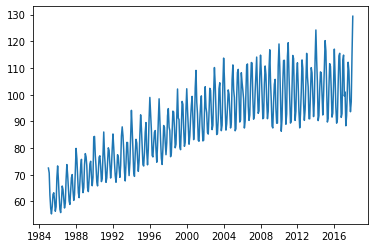

In [12]:
#Plotando Grafico de Consumo de Eletricidade
plt.plot(df.index, df.Value);

In [0]:
#Decompondo a Seasonal
result = seasonal_decompose(df)

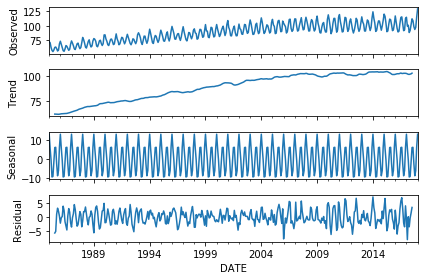

In [14]:
result.plot();

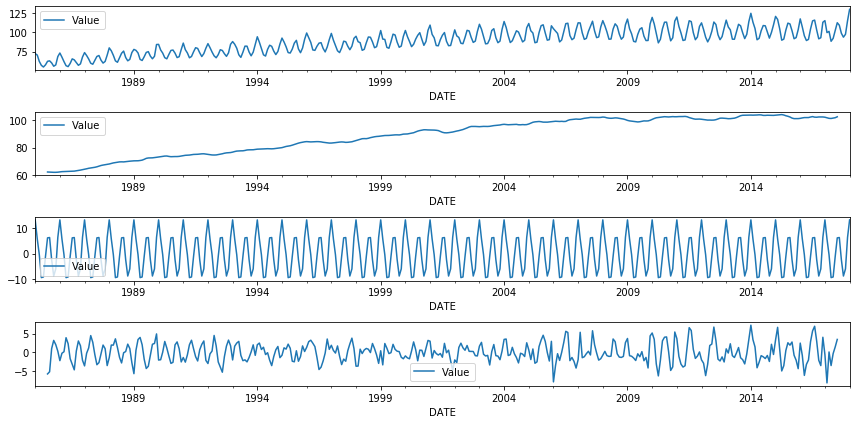

In [15]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,6))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

## Análise Exploratória e extração de features

In [0]:
#Importando dataset ferroviaria
data_ferroviaria = "https://raw.githubusercontent.com/carlosfab/datasets/master/jetrail/jetrail.csv"

In [0]:
df_trem = pd.read_csv(data_ferroviaria)

In [18]:
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [19]:
#Tipo da Coluna Datetime
display(df_trem.Datetime.head())

0    25-08-2012 00:00
1    25-08-2012 01:00
2    25-08-2012 02:00
3    25-08-2012 03:00
4    25-08-2012 04:00
Name: Datetime, dtype: object

In [0]:
#Tranformando Datetime em Datetime
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

In [21]:
df_trem.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


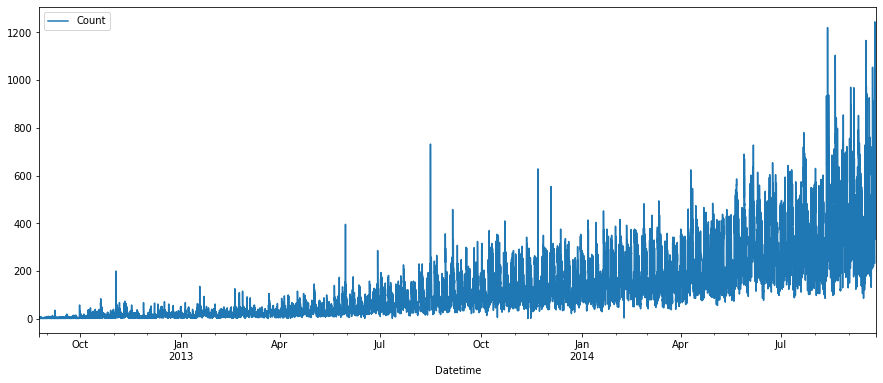

In [23]:
#Plotando o grafico
fig, ax = plt.subplots(figsize=(15,6))
df_trem.plot(x="Datetime", y="Count", ax=ax)

In [0]:
#Criar features para cada periodo
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

In [25]:
df_trem.head()

,ID,Datetime,Count,month,day,year,hour,day_of_week
0,0,2012-08-25 00:00:00,8,8,25,2012,0,5
1,1,2012-08-25 01:00:00,2,8,25,2012,1,5
2,2,2012-08-25 02:00:00,6,8,25,2012,2,5
3,3,2012-08-25 03:00:00,2,8,25,2012,3,5
4,4,2012-08-25 04:00:00,2,8,25,2012,4,5


In [0]:
#Dias da Semana
df_trem['weekend'] = 0

In [28]:
df_trem.head()

,ID,Datetime,Count,month,day,year,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,8,25,2012,0,5,0
1,1,2012-08-25 01:00:00,2,8,25,2012,1,5,0
2,2,2012-08-25 02:00:00,6,8,25,2012,2,5,0
3,3,2012-08-25 03:00:00,2,8,25,2012,3,5,0
4,4,2012-08-25 04:00:00,2,8,25,2012,4,5,0


In [0]:
#Descobrindo Fim de semana
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1

In [33]:
df_trem.head()

,ID,Datetime,Count,month,day,year,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,8,25,2012,0,5,1
1,1,2012-08-25 01:00:00,2,8,25,2012,1,5,1
2,2,2012-08-25 02:00:00,6,8,25,2012,2,5,1
3,3,2012-08-25 03:00:00,2,8,25,2012,3,5,1
4,4,2012-08-25 04:00:00,2,8,25,2012,4,5,1


In [40]:
#Verificando a Porcentagem entre Fim de Semana X Dias de Semana
df_trem.weekend.value_counts() / df_trem.shape[0] * 100

0    71.391076
1    28.608924
Name: weekend, dtype: float64

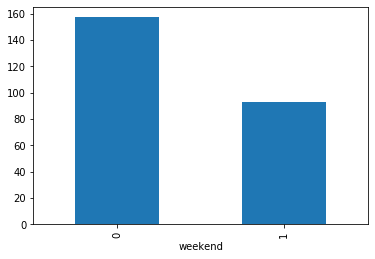

In [42]:
df_trem.groupby('weekend').Count.mean().plot.bar();

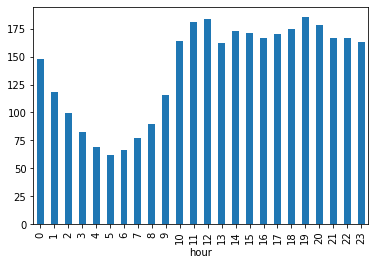

In [43]:
#Verificar picos de horario
df_trem.groupby('hour').Count.mean().plot.bar();

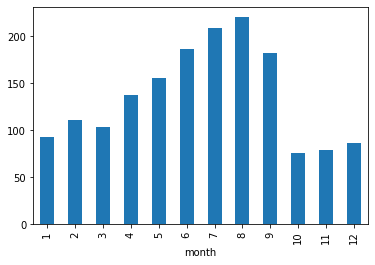

In [45]:
#Periodo dos anos que os valores sãão maiores
df_trem.groupby('month').Count.mean().plot.bar();

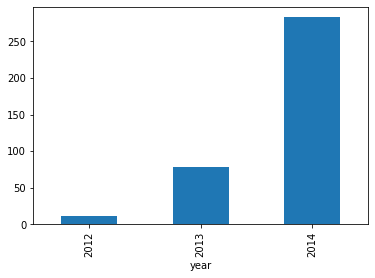

In [46]:
df_trem.groupby('year').Count.mean().plot.bar();